<center><img src="./images/image-classification.jpg"></center>

In [9]:
pip install azure-cognitiveservices-vision-customvision

In [ ]:
project_id = ''

cv_key = ''

cv_endpoint = ''

model_name = 'Iteration1'
print(f'Ready to predict using model {model_name} in project {project_id}')

Ready to predict using model Iteration1 in project 5f481413-38c3-4a96-b0d2-a26add479c60


In [11]:
from azure.cognitiveservices.vision.customvision.prediction import CustomVisionPredictionClient
from msrest.authentication import ApiKeyCredentials
import matplotlib.pyplot as plt
from PIL import Image
import os
import time
import math

In [12]:
# Get the test images from the data/vision/test folder
test_folder = os.path.join('/content/sample_data')
test_images = os.listdir(test_folder)

In [13]:
# Create an instance of the prediction service
credentials = ApiKeyCredentials(in_headers={"Prediction-key": cv_key})
custom_vision_client = CustomVisionPredictionClient(endpoint=cv_endpoint, credentials=credentials)

Classifying images in /content/sample_data ...


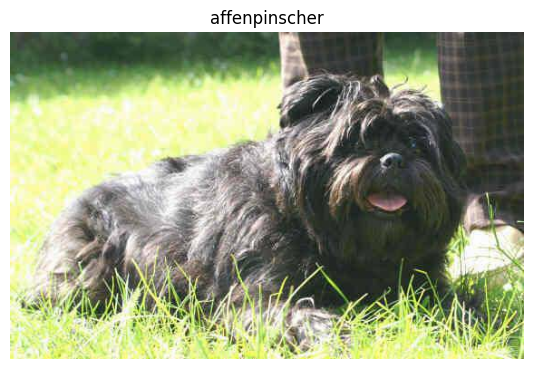

In [14]:
fig = plt.figure(figsize=(16, 8))

print(f'Classifying images in {test_folder} ...')
supported_image_formats = ['.jpg', '.jpeg', '.png', '.gif', '.bmp']
test_images = [f for f in test_images if os.path.splitext(f)[1].lower() in supported_image_formats]
rows = math.ceil(len(test_images) / 3)
for i in range(len(test_images)):
    image_contents = open(os.path.join(test_folder, test_images[i]), "rb")
    try:
      classification = custom_vision_client.classify_image(project_id, model_name, image_contents.read())
      prediction = classification.predictions[0].tag_name
      img = Image.open(os.path.join(test_folder, test_images[i]))
      a = fig.add_subplot(rows, 3, i+1)
      a.axis('off')
      imgplot = plt.imshow(img)
      a.set_title(prediction)
    except Exception as e:
      print(f"Could not classify image {test_images[i]}: {e}")

plt.tight_layout()
plt.show()

Classifying images in /content/sample_data ...


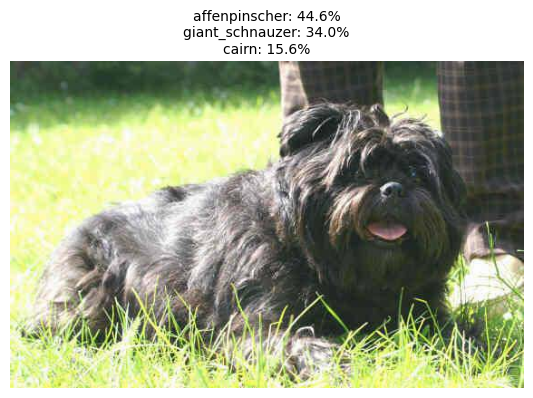

In [15]:
fig = plt.figure(figsize=(16, 8))
rows = math.ceil(len(test_images) / 3)

print(f'Classifying images in {test_folder} ...')

for i in range(len(test_images)):
    image_path = os.path.join(test_folder, test_images[i])

    try:
        with open(image_path, "rb") as image_contents:
            classification = custom_vision_client.classify_image(
                project_id, model_name, image_contents
            )

        img = Image.open(image_path)
        a = fig.add_subplot(rows, 3, i+1)
        a.axis('off')
        plt.imshow(img)

        predictions = classification.predictions[:3]
        title_lines = [f"{p.tag_name}: {p.probability*100:.1f}%" for p in predictions]
        title_text = "\n".join(title_lines)

        a.set_title(title_text, fontsize=10)

    except Exception as e:
        print(f" Could not classify image {test_images[i]}: {e}")
        time.sleep(5)

plt.tight_layout()
plt.show()

In [16]:
print("Files in the test folder:")
for file_name in test_images:
    print(file_name)

Files in the test folder:
fb56acfbe4b95a0df7a4b9e6bddbafd0.jpg
